In [2]:
import eagleSqlTools as sql
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as col
from mpl_toolkits.axes_grid1 import make_axes_locatable

con = sql.connect("vwg533", password = "FZtn087h")

In [74]:
sim_name = 'RefL0100N1504'
sim_size = 100.
    
# Construct and execute query for each simulation. This query returns the number of galaxies 
# for a given 30 pkpc aperture stellar mass bin (centered with 0.2 dex width). 
Query_1 = "SELECT \
            (MAG.u_nodust - MAG.r_nodust) as u_minus_r, \
            log10(AP.Mass_Star) as mass, \
            (AP.SFR/AP.Mass_Star) as ssfr \
           FROM \
            %s_SubHalo as SH, \
            %s_Magnitudes as MAG, \
            %s_Aperture as AP \
           WHERE \
            SH.SnapNum = 27 and \
            SH.SubGroupNumber = 0 and \
            AP.Mass_Star > 1.0e9 and \
            AP.ApertureSize = 30 and \
            SH.GalaxyID = MAG.GalaxyID and \
            SH.GalaxyID = AP.GalaxyID"%(sim_name, sim_name, sim_name)

Query_2 = "SELECT \
            (MAG.u_nodust - MAG.r_nodust) as u_minus_r, \
            log10(AP.Mass_Star) as mass, \
            (AP.SFR/AP.Mass_Star) as ssfr \
           FROM \
            %s_SubHalo as SH, \
            %s_Magnitudes as MAG, \
            %s_Aperture as AP \
           WHERE \
            SH.SnapNum = 27 and \
            SH.SubGroupNumber = 0 and \
            AP.Mass_Star < 3.1622776601684e10 and \
            AP.Mass_Star > 1.0e10 and \
            AP.ApertureSize = 30 and \
            SH.GalaxyID = MAG.GalaxyID and \
            SH.GalaxyID = AP.GalaxyID"%(sim_name, sim_name, sim_name)

Query_3 = "SELECT \
            (MAG.u_nodust - MAG.r_nodust) as u_minus_r, \
            log10(AP.Mass_Star) as mass, \
            (AP.SFR/AP.Mass_Star) as ssfr \
           FROM \
            %s_SubHalo as SH, \
            %s_Magnitudes as MAG, \
            %s_Aperture as AP \
           WHERE \
            SH.SnapNum = 27 and \
            SH.SubGroupNumber = 0 and \
            AP.Mass_Star > 1.0e9 and \
            (AP.SFR/AP.Mass_Star) > 5.0e-12 and \
            AP.ApertureSize = 30 and \
            SH.GalaxyID = MAG.GalaxyID and \
            SH.GalaxyID = AP.GalaxyID"%(sim_name, sim_name, sim_name)

Query_4 = "SELECT \
            (MAG.u_nodust - MAG.r_nodust) as u_minus_r, \
            log10(AP.Mass_Star) as mass, \
            (AP.SFR/AP.Mass_Star) as ssfr \
           FROM \
            %s_SubHalo as SH, \
            %s_Magnitudes as MAG, \
            %s_Aperture as AP \
           WHERE \
            SH.SnapNum = 27 and \
            SH.SubGroupNumber = 0 and \
            AP.Mass_Star > 1.0e9 and \
            (AP.SFR/AP.Mass_Star) < 5.0e-12 and \
            AP.ApertureSize = 30 and \
            SH.GalaxyID = MAG.GalaxyID and \
            SH.GalaxyID = AP.GalaxyID"%(sim_name, sim_name, sim_name)

# Execute queries.
Data_1 = sql.execute_query(con, Query_1)
Data_2 = sql.execute_query(con, Query_2)
Data_3 = sql.execute_query(con, Query_3)
Data_4 = sql.execute_query(con, Query_4)

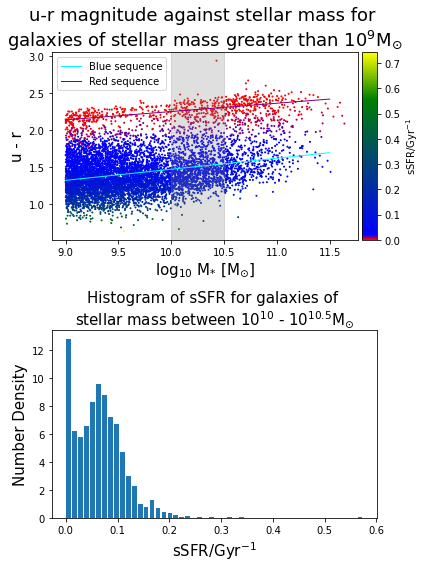

In [75]:
cvals  = [-2., -1.9, 1, 2]
colors = ["red","blue","green", "yellow"]
norm = plt.Normalize(min(cvals),max(cvals))
tuples = list(zip(map(norm,cvals), colors))
cmap = col.LinearSegmentedColormap.from_list("", tuples)

fig, (ax1, ax2) = plt.subplots(2, figsize = (6,8))
im1 = ax1.scatter(Data_1['mass'], Data_1['u_minus_r'], s=1, c = Data_1['ssfr']*10**9, cmap = cmap)
im2 = ax2.hist(Data_2['ssfr']*10**9, bins = 50, density = True, rwidth = 0.8)
ax1.axvspan(10, 10.5, color='grey', alpha=0.25)

xs = np.arange(9., 11.51, 0.01)
x3 = Data_3['mass']
y3 = Data_3['u_minus_r']
x4 = Data_4['mass']
y4 = Data_4['u_minus_r']
Params_3 = np.polyfit(x3, y3, 1)
Params_4 = np.polyfit(x4, y4, 1)
line_3 = Params_3[1] + Params_3[0] * xs
line_4 = Params_4[1] + Params_4[0] * xs
ax1.plot(xs, line_3, linewidth = 1, color = 'cyan', label = 'Blue sequence')
ax1.plot(xs, line_4, linewidth = 1, color = 'purple', label = 'Red sequence')
ax1.legend()

divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical', label = r'sSFR/Gyr$^{-1}$')

ax1.set_title('u-r magnitude against stellar mass for \n' + r'galaxies of stellar mass greater than 10$^{9}$M$_{\odot}$', fontsize=18)
ax2.set_title('Histogram of sSFR for galaxies of \n' + r'stellar mass between 10$^{10}$ - 10$^{10.5}$M$_{\odot}$', fontsize=15)
ax1.set_xlabel(r'log$_{10}$ M$_{*}$ [M$_{\odot}$]', fontsize=15)
ax1.set_ylabel(r'u - r', fontsize=15)
ax2.set_xlabel(r'sSFR/Gyr$^{-1}$', fontsize=15)
ax2.set_ylabel(r'Number Density', fontsize=15)

plt.tight_layout()
plt.savefig('Plot_1.pdf')
plt.show()